<a href="https://colab.research.google.com/github/AfrahAlharbi/ML_Week2/blob/main/W2_day1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Assignment

Note: target variable is `total_amount`.


1. Load in a sample of the NYC taxi dataset through this parquet link: `https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_parquet("https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-21 07:55:21,2019-12-21 08:00:18,1.0,1.20,1.0,N,148,4,2.0,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5
1,1.0,2019-12-08 13:20:45,2019-12-08 13:28:32,1.0,1.10,1.0,N,113,90,1.0,7.0,2.5,0.5,3.00,0.0,0.3,13.30,2.5
2,2.0,2019-12-28 14:41:40,2019-12-28 14:52:29,1.0,1.12,1.0,N,186,137,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5
3,2.0,2019-12-05 23:42:35,2019-12-05 23:59:18,2.0,3.80,1.0,N,230,263,1.0,14.5,0.5,0.5,3.66,0.0,0.3,21.96,2.5
4,1.0,2019-12-13 12:30:25,2019-12-13 12:45:04,2.0,2.10,1.0,N,162,239,1.0,11.5,2.5,0.5,3.00,0.0,0.3,17.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482737,1.0,2019-12-12 15:22:02,2019-12-12 15:25:26,1.0,0.20,1.0,N,140,140,1.0,4.0,0.0,0.5,0.95,0.0,0.3,5.75,0.0
482738,1.0,2019-12-28 18:36:46,2019-12-28 18:44:33,1.0,1.80,1.0,N,263,75,2.0,8.0,2.5,0.5,0.00,0.0,0.3,11.30,2.5
482739,1.0,2019-12-07 19:58:00,2019-12-07 20:17:30,1.0,1.40,1.0,N,246,164,1.0,12.5,2.5,0.5,3.15,0.0,0.3,18.95,2.5
482740,2.0,2019-12-14 12:27:36,2019-12-14 12:43:30,1.0,5.58,1.0,N,170,88,1.0,18.5,0.0,0.5,4.36,0.0,0.3,26.16,2.5


In [ ]:
df.isnull().sum()

VendorID                 3644
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          3644
trip_distance               0
RatecodeID               3644
store_and_fwd_flag       3644
PULocationID                0
DOLocationID                0
payment_type             3644
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

2. Find out some information about the data...

In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000,479098.000000
mean,1.666173,1.550393,2.943216,1.065156,163.706513,161.952607,1.298091,14.215789,1.097324,0.493596,2.262038,0.379203,0.297997,20.276440,2.292249
std,0.471579,1.174092,3.885494,0.903839,66.065929,70.137809,0.487450,575.794642,1.263896,0.068135,2.856731,1.679648,0.033714,575.858332,0.711418
min,1.000000,0.000000,-6.200000,1.000000,1.000000,1.000000,1.000000,-180.000000,-4.500000,-0.500000,-98.760000,-21.230000,-0.300000,-180.300000,-2.500000
25%,1.000000,1.000000,0.950000,1.000000,125.000000,113.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.300000,2.500000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.950000,0.000000,0.300000,14.800000,2.500000
75%,2.000000,2.000000,3.000000,1.000000,233.000000,234.000000,2.000000,15.000000,2.500000,0.500000,3.000000,0.000000,0.300000,21.300000,2.500000
max,2.000000,9.000000,93.740000,99.000000,265.000000,265.000000,4.000000,398468.380000,90.060000,0.900000,225.000000,113.880000,0.300000,398471.200000,2.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479098 entries, 0 to 482741
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               479098 non-null  float64
 1   tpep_pickup_datetime   479098 non-null  object 
 2   tpep_dropoff_datetime  479098 non-null  object 
 3   passenger_count        479098 non-null  float64
 4   trip_distance          479098 non-null  float64
 5   RatecodeID             479098 non-null  float64
 6   store_and_fwd_flag     479098 non-null  object 
 7   PULocationID           479098 non-null  int64  
 8   DOLocationID           479098 non-null  int64  
 9   payment_type           479098 non-null  float64
 10  fare_amount            479098 non-null  float64
 11  extra                  479098 non-null  float64
 12  mta_tax                479098 non-null  float64
 13  tip_amount             479098 non-null  float64
 14  tolls_amount           479098 non-nu

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [ ]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.165798,0.025826,0.009225,-0.006963,-0.002515,-0.012707,-0.001725,-0.858735,-0.028355,0.021642,0.010144,-0.039408,-0.001597,-0.009748
passenger_count,0.165798,1.000000,0.019496,0.000271,-0.006724,-0.004947,0.016564,-0.000294,-0.135692,0.002063,0.000780,0.012475,0.003783,-0.000227,0.013716
trip_distance,0.025826,0.019496,1.000000,0.144107,-0.094075,-0.105838,-0.020566,0.017337,-0.010598,-0.069476,0.524413,0.619455,0.018216,0.021595,-0.193941
RatecodeID,0.009225,0.000271,0.144107,1.000000,-0.008881,0.002503,0.006139,0.004868,-0.022093,-0.181959,0.133305,0.155296,-0.039509,0.005854,-0.094704
PULocationID,-0.006963,-0.006724,-0.094075,-0.008881,1.000000,0.106491,-0.028173,-0.000130,0.020532,0.004405,-0.030446,-0.048641,0.002988,-0.000290,0.123645
DOLocationID,-0.002515,-0.004947,-0.105838,0.002503,0.106491,1.000000,-0.029818,-0.000288,0.019605,0.024005,-0.036972,-0.064938,0.000169,-0.000520,0.123966
payment_type,-0.012707,0.016564,-0.020566,0.006139,-0.028173,-0.029818,1.000000,0.006944,-0.021476,-0.178163,-0.484442,-0.033897,-0.221938,0.004156,-0.175131
fare_amount,-0.001725,-0.000294,0.017337,0.004868,-0.000130,-0.000288,0.006944,1.000000,0.001263,-0.005854,0.011026,0.012538,-0.010388,0.999976,-0.003728
extra,-0.858735,-0.135692,-0.010598,-0.022093,0.020532,0.019605,-0.021476,0.001263,1.000000,0.089757,0.011126,-0.006051,0.064162,0.001905,0.187133
mta_tax,-0.028355,0.002063,-0.069476,-0.181959,0.004405,0.024005,-0.178163,-0.005854,0.089757,1.000000,-0.076968,-0.168556,0.790194,-0.005996,0.398662


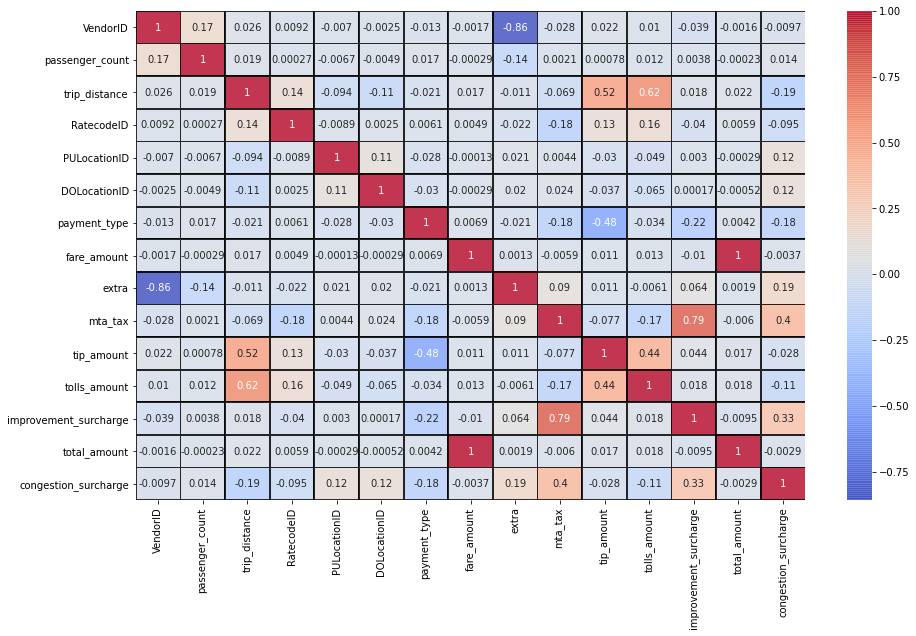

In [ ]:
plt.figure(figsize=(15,9)),

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', alpha= 0.8,linewidths=0.8, linecolor='black')

In [ ]:
# create pairplot
#sns.pairplot(data = df);

4. Split your data into training and testing datasets...

In [ ]:
from sklearn.model_selection import train_test_split

# focus single variable because we're doing simple linear regression
X = df.trip_distance
y = df.total_amount

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

5. Import, create, and fit a LinearRegression model with 1 variable

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(pd.DataFrame(X_train), y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.intercept_


11.298856913125189

In [ ]:
lr.coef_


array([3.14091519])

6. Make predictions on your `X_test` values...

In [ ]:
predictions = lr.predict(pd.DataFrame(X_test))


In [ ]:
# what do they look like? (show me some of the predictions)
predictions

array([30.01871147, 12.55522299, 44.59255797, ..., 14.50259041,
       66.57896432, 18.71141677])

7. Score your model...
- r2_score
- other metric (of your choice...)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=predictions)

0.7221955740593509

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y_test, y_pred=predictions)

4.16065659533046

In [ ]:
y_test.mean()

19.473391609272227

In [ ]:
y_test.std()

15.380032415081416

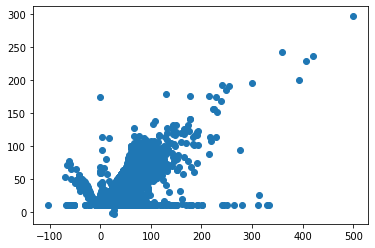

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)

8. Create, and fit a LinearRegression model with **more than** 1 variable

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
vars = [
        'fare_amount', 'mta_tax', 'trip_distance', 'improvement_surcharge',  # high +- corr
        'passenger_count', 'congestion_surcharge',  # make sense in my head
        'tolls_amount'  # similar corr to total_amount
        ]

X = df[vars]
y = df.total_amount

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [ ]:
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

9. Make predictions on your `X_test` values...

In [ ]:
lr.intercept_


0.4120877322465226

In [ ]:
lr.coef_


array([ 1.00000811, -4.66827576,  0.32787211, 11.26327142, -0.02349401,
        1.38645275,  1.28682812])

In [ ]:
predictions = lr.predict(X_test)
predictions

array([31.75991368, 11.00727265, 39.37526496, ..., 10.73404331,
       57.70439603, 16.67343655])

In [ ]:
# what do they look like? (show me some of the predictions)
predictions[-5:]


array([ 5.08100811, 11.69470677, 10.73404331, 57.70439603, 16.67343655])

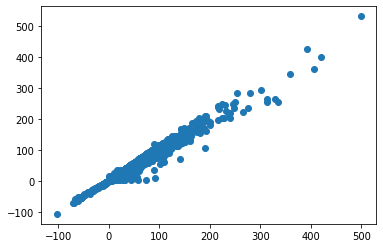

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)

10. Score your model...
- r2_score
- other metric (of your choice...)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=predictions)

0.9753768943190224

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y_test, y_pred=predictions)

1.5838309425460608

In [ ]:
y_test.mean()

19.473391609272227

In [ ]:
y_test.std()

15.380032415081416

11. Which model is better? Why?

**LinearRegression model with more than 1 variable is better than one variable**

**As we apply more right features, our predictions will be more accurate** 

12. Perform GridSearchCV with the better data

In [ ]:

from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False],
          'normalize': [True, False]}

grid = GridSearchCV(lr, p_grid)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'fit_intercept': False, 'normalize': True}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [ ]:
lr = LinearRegression(fit_intercept=False,
                      normalize=True)

In [ ]:
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [ ]:
preds = lr.predict(X_test)
preds

array([31.7813641 , 11.00533476, 39.38003928, ..., 10.72728586,
       57.71110555, 16.66829389])

14. Score the new model... 
- r2_score
- some other metric of your choice

In [ ]:
r2_score(y_true=y_test, y_pred=preds)


0.9753642582910845

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=preds)

1.5847153150912776

Did the score change at all? Why?

Our score is the same,
The GridSearchCV is to show us if our preidctions are rights or not. So, as the scores matched, it mean that our predictions where right.

